In [74]:
import pandas as pd
import time
import datetime
import numpy as np
import split_data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl  
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('../data/zhao_neng_2_month.txt',sep='\t',header=None,names=['ap_mac','timestamp','count'])
print('原始数据ap个数',len(df.ap_mac.unique()))

原始数据ap个数 60599


In [5]:
df.tail()

,ap_mac,time,count
17042778,64-9A-08-0F-BF-9A,1524621600,98
17042779,64-9A-08-0F-BF-F2,1524618000,24
17042780,64-9A-08-0F-C0-BA,1524628800,35
17042781,64-9A-08-0F-C0-BA,1524636000,304
17042782,64-9A-08-0F-C0-BA,1524639600,4467


In [25]:
groupd = df.groupby('ap_mac')
cnt_series = groupd['count'].count()
cnt_series.sort_values(ascending=False,inplace=True)

In [65]:
print(cnt_series.median())
cnt_series.head()

204.0


ap_mac
60-31-3B-1E-DA-F4    1460
60-31-3B-1C-49-91    1459
60-31-3B-1E-A1-52    1458
60-31-3B-1E-C0-06    1458
64-9A-08-05-97-D0    1457
Name: count, dtype: int64

/usr/share/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


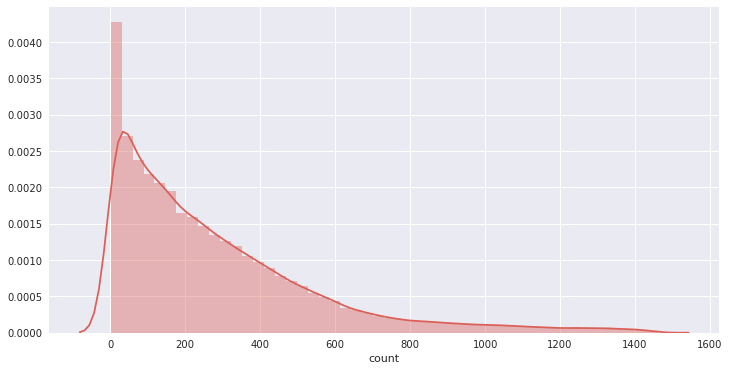

In [26]:
sns.set_palette("hls")  
mpl.rc("figure", figsize=(12, 6))  
sns.distplot(cnt_series)
plt.show()

In [89]:
top1_ap = df[df.ap_mac=='60-31-3B-1E-DA-F4'][['timestamp','count']]
top1_ap['datetime'] = top1_ap.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
top1_ap.set_index('datetime',drop=True, inplace=True)

In [90]:
top1_ap.head()

,timestamp,count
datetime,,
2018-02-28 23:00:00,1519830000,4
2018-03-01 00:00:00,1519833600,3129
2018-03-01 01:00:00,1519837200,1089
2018-03-01 02:00:00,1519840800,85
2018-03-01 03:00:00,1519844400,340


In [42]:
import plot_show

Loading BokehJS ...

In [71]:
plot_show.plt_one_ts(top1_ap['count'][:24*10])

In [72]:
top_ap_oneday = top1_ap[:]
top_ap_oneday['time'] = top_ap_oneday.timestamp.apply(lambda x: time.localtime(x))
top_ap_oneday['datetime'] = top1_ap.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
top_ap_oneday['hour'] = top_ap_oneday.time.apply(lambda x: x.tm_hour)
top_ap_oneday['weekday'] = top_ap_oneday.datetime.apply(lambda x: x.isoweekday())

In [104]:
groupd_top = top_ap_oneday.groupby(['weekday','hour'], as_index=False)['count'].agg(sum)
plot_show.plt_one_ts(groupd_top['count'])

In [106]:
groupd_top_one_day = top_ap_oneday.groupby(['hour'], as_index=False)['count'].agg(sum)
plot_show.plt_one_ts(groupd_top_one_day['count'])